In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

## TSLA Stock Price Data

In [144]:
#pip install pandas-datareader

In [145]:
#pip install yfinance

In [146]:
from pandas_datareader import data
import yfinance as yfin
yfin.pdr_override()

**Important Note**

The first trading day for Tesla's stock was on June 29, 2010
so it is not possible to get the stock price for June 4, 2010! So I adjusted the start date to be 2010-06-29!

In [162]:
start_date='2010-06-04'
end_date='2021-04-17'

In [163]:
df = data.get_data_yahoo("TSLA", start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [164]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


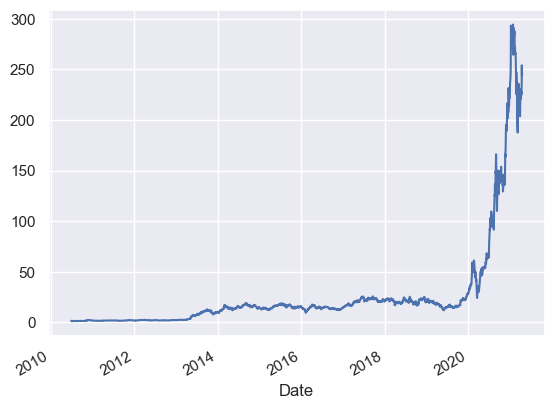

In [165]:
%matplotlib inline
import seaborn; seaborn.set()
df['Adj Close'].plot();

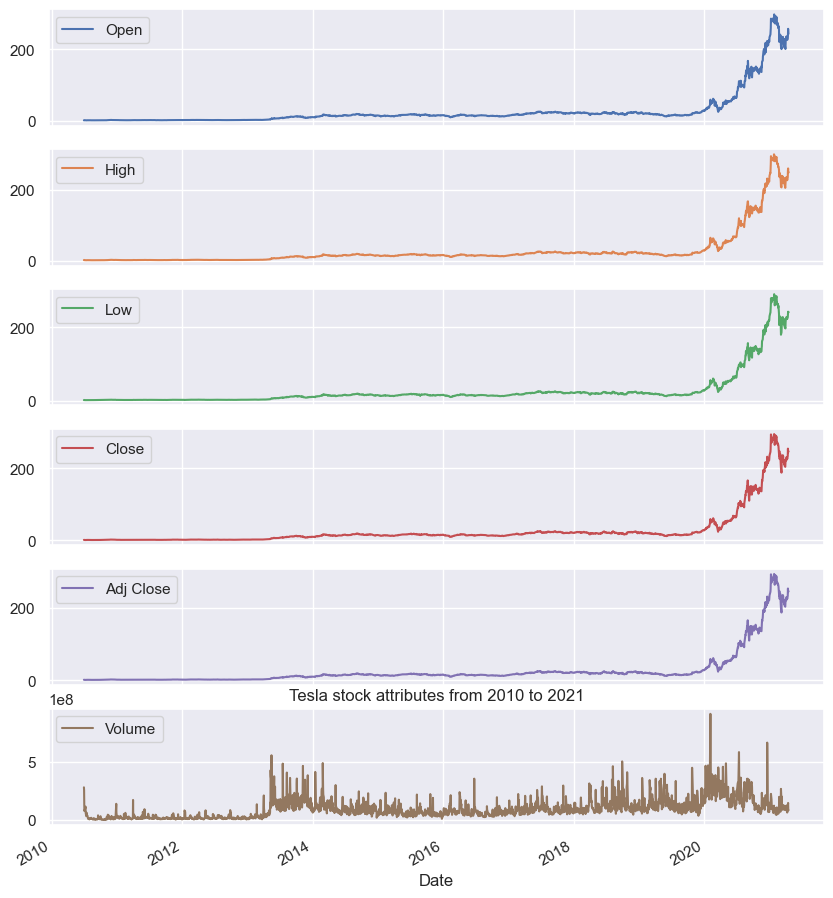

In [166]:
df.plot(subplots=True, figsize=(10,12))
plt.title('Tesla stock attributes from 2010 to 2021')
plt.savefig('stocks.png')
plt.show()

In [167]:
tesla=df.copy()

### Percent change

<AxesSubplot:xlabel='Date'>

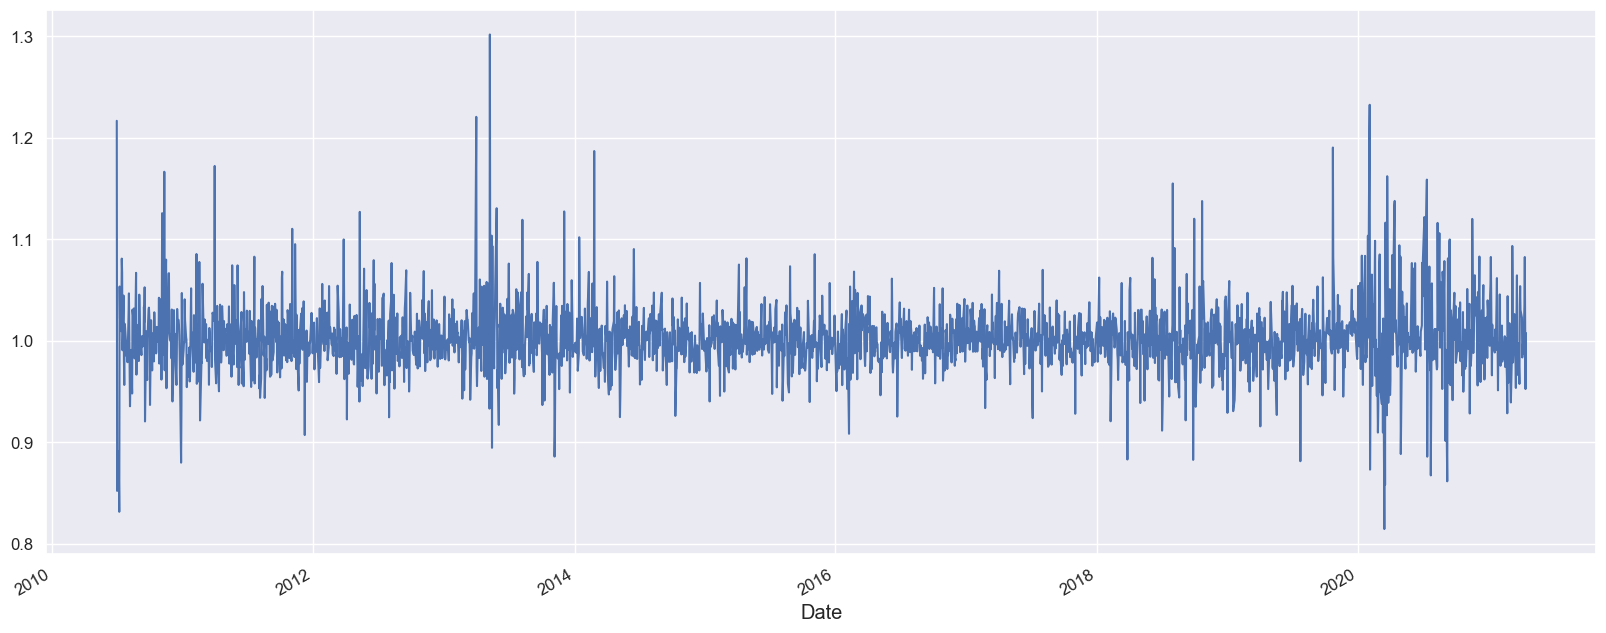

In [366]:
tesla['Change'] = tesla.High.div(tesla.High.shift())
tesla['Change'].plot(figsize=(20,8))

### Stock Returns

<AxesSubplot:xlabel='Date'>

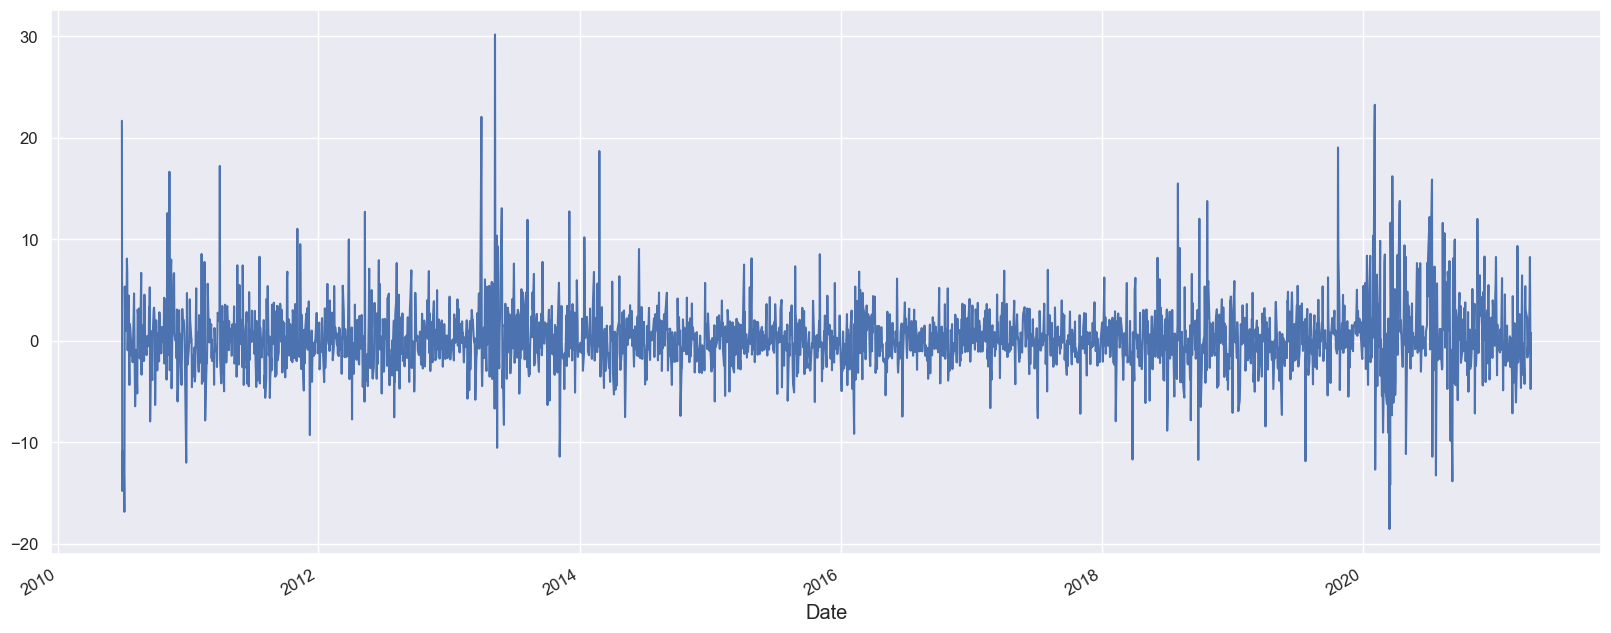

In [367]:
tesla['Return'] = tesla.Change.sub(1).mul(100)
tesla['Return'].plot(figsize=(20,8))

### Absolute change in successive rows

<AxesSubplot:xlabel='Date'>

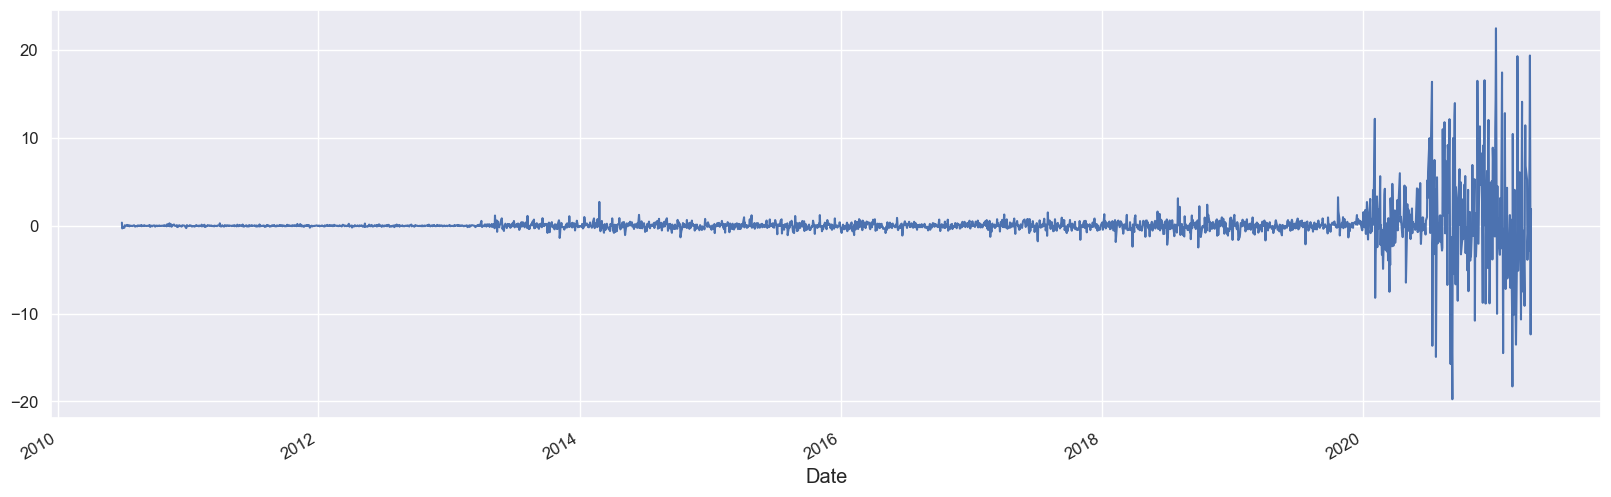

In [370]:
tesla.High.diff().plot(figsize=(20,6))


### OHLC charts
An OHLC chart is any type of price chart that shows the open, high, low and close price of a certain time period. Open-high-low-close Charts (or OHLC Charts) are used as a trading tool to visualise and analyse the price changes over time for securities, currencies, stocks, bonds, commodities, etc. OHLC Charts are useful for interpreting the day-to-day sentiment of the market and forecasting any future price changes through the patterns produced.

In [171]:
# OHLC chart of April 2021
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot


trace = go.Ohlc(x=tesla['4-2021'].index,
                open=tesla['4-2021'].Open,
                high=tesla['4-2021'].High,
                low=tesla['4-2021'].Low,
                close=tesla['4-2021'].Close)
data = [trace]
iplot(data, filename='simple_ohlc')

In [172]:
# OHLC chart of 2021
trace = go.Ohlc(x=tesla['2021'].index,
                open=tesla['2021'].Open,
                high=tesla['2021'].High,
                low=tesla['2021'].Low,
                close=tesla['2021'].Close)
data = [trace]
iplot(data, filename='simple_ohlc')

In [173]:
# OHLC chart from 2010 to 2021
trace = go.Ohlc(x=tesla.index,
                open=tesla.Open,
                high=tesla.High,
                low=tesla.Low,
                close=tesla.Close)
data = [trace]
iplot(data, filename='simple_ohlc')

### Candlestick Charts
- Candlestick charts are used by traders to determine possible price movement based on past patterns.
- Candlesticks are useful when trading as they show four price points (open, close, high, and low) throughout the period of time the trader specifies.


In [174]:
# Candlestick chart of April 2021
trace = go.Candlestick(x=tesla['4-2021'].index,
                open=tesla['4-2021'].Open,
                high=tesla['4-2021'].High,
                low=tesla['4-2021'].Low,
                close=tesla['4-2021'].Close)
data = [trace]
iplot(data, filename='simple_candlestick')

In [175]:
# Candlestick chart of 2021
trace = go.Candlestick(x=tesla['2021'].index,
                open=tesla['2021'].Open,
                high=tesla['2021'].High,
                low=tesla['2021'].Low,
                close=tesla['2021'].Close)
data = [trace]
iplot(data, filename='simple_candlestick')

In [176]:
# Candlestick chart of 2010-2021
trace = go.Candlestick(x=tesla.index,
                open=tesla.Open,
                high=tesla.High,
                low=tesla.Low,
                close=tesla.Close)
data = [trace]
iplot(data, filename='simple_candlestick')

## Autocorrelation and Partial Autocorrelation
Autocorrelation - The autocorrelation function (ACF) measures how a series is correlated with itself at different lags.

Partial Autocorrelation - The partial autocorrelation function can be interpreted as a regression of the series against its past lags. The terms can be interpreted the same way as a standard linear regression, that is the contribution of a change in that particular lag while holding others constant.

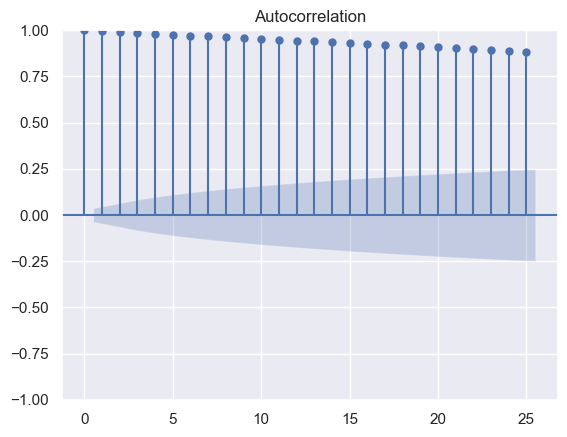

In [177]:
# Autocorrelation of closing price of tesla stocks
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(tesla["Adj Close"],lags=25)
plt.show()

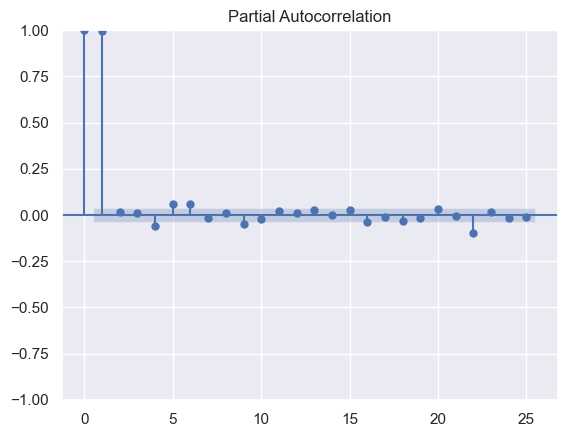

In [178]:
# Partial Autocorrelation of closing price of tesla stocks
plot_pacf(tesla["Adj Close"],lags=25)
plt.show()
#Here, only 0th, 1st,22th, 25th lag are statistically significant.

#### Take-away from PACF
Here upto Lag-value 2, we have strong correlation. So we can keep lag value 2 for our further experiments.


## Time series decomposition 
**Trends, seasonality and noise**

These are the components of a time series

- Trend - Consistent upwards or downwards slope of a time series
- Seasonality - Clear periodic pattern of a time series(like sine funtion)
- Noise - Outliers or missing values

In [179]:
X=df['Adj Close'].copy()

In [180]:
#Convert it to df
X=X.to_frame()

In [181]:
#  Apply log transformation
X1 = np.log(X)

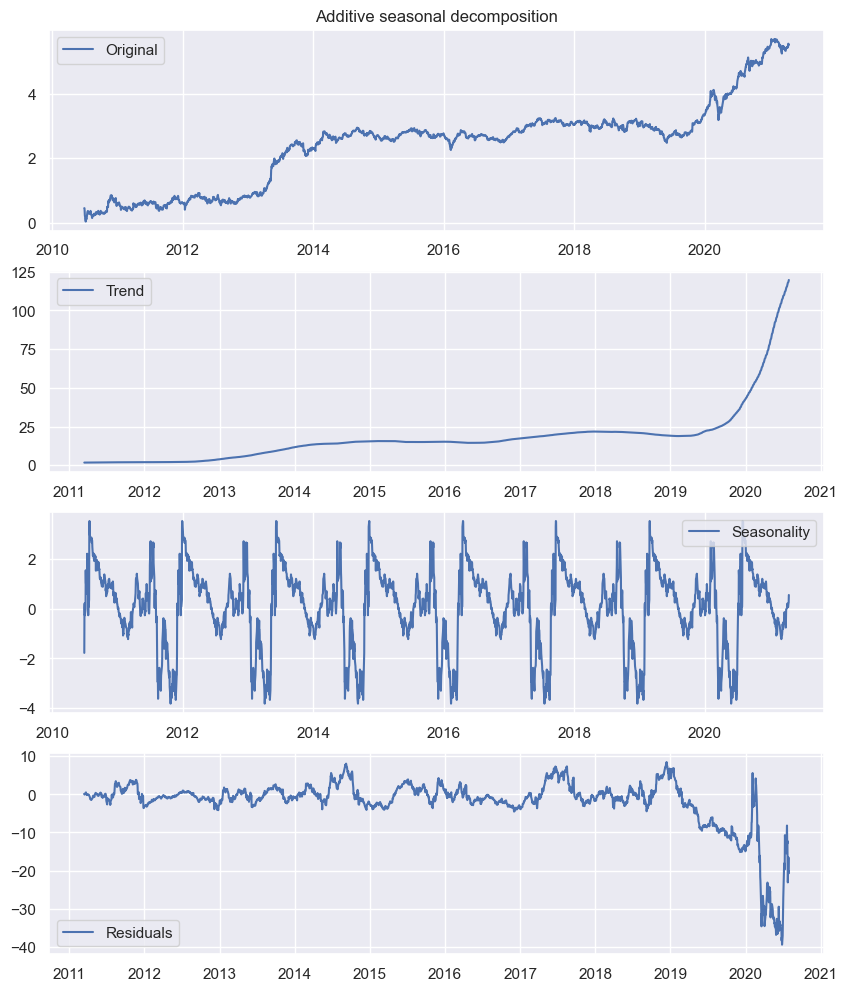

In [182]:
import statsmodels.api as sm

# Additive seasonal decomposition
decomposition_add = sm.tsa.seasonal_decompose(X, model='additive', period=360)
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(10, 12))

ax[0].set_title('Additive seasonal decomposition')
ax[0].plot(X1, label='Original')
ax[0].legend(loc='best')
ax[1].plot(decomposition_add.trend, label='Trend')
ax[1].legend(loc='best')
ax[2].plot(decomposition_add.seasonal,label='Seasonality')
ax[2].legend(loc='best')
ax[3].plot(decomposition_add.resid, label='Residuals')
ax[3].legend(loc='best')

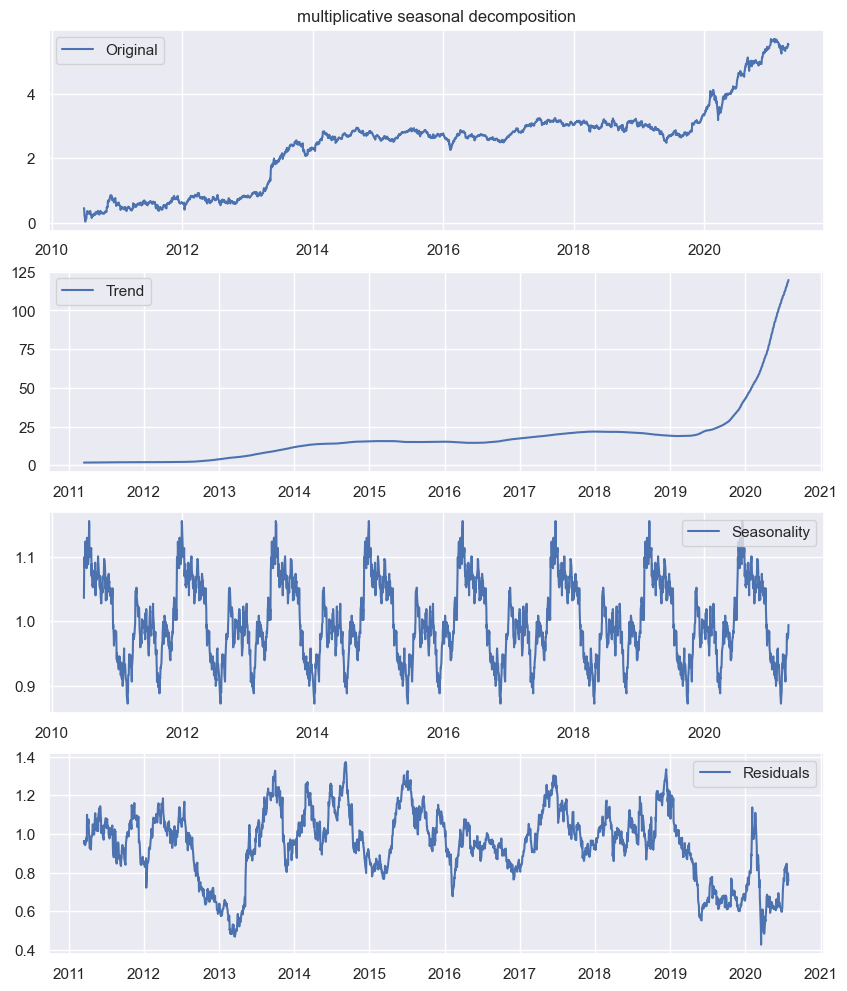

In [183]:
# multiplicative seasonal decomposition
decomposition_add = sm.tsa.seasonal_decompose(X, model='multiplicative', period=360)
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(10, 12))

ax[0].set_title('multiplicative seasonal decomposition')
ax[0].plot(X1, label='Original')
ax[0].legend(loc='best')
ax[1].plot(decomposition_add.trend, label='Trend')
ax[1].legend(loc='best')
ax[2].plot(decomposition_add.seasonal,label='Seasonality')
ax[2].legend(loc='best')
ax[3].plot(decomposition_add.resid, label='Residuals')
ax[3].legend(loc='best')

## Stationary Check

In [184]:
#Check if data is stationary
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))
mean1,mean2,var1,var2

mean1=7.437693, mean2=45.232538
variance1=38.653895, variance2=3873.411377


(Adj Close    7.437693
 dtype: float64,
 Adj Close    45.232538
 dtype: float64,
 Adj Close    38.653895
 dtype: float64,
 Adj Close    3873.411377
 dtype: float64)

In [420]:
tesla.head()

,Open,High,Low,Close,Adj Close,Volume,Change,Return,Absolute change
Date,,,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,NaN,NaN,NaN
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,1.216800,21.679984,0.361333
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,0.852071,-14.792902,-0.300000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,0.891204,-10.879634,-0.188000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,0.865801,-13.419932,-0.206667


In [422]:
tesla.index

DatetimeIndex(['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02',
               '2010-07-06', '2010-07-07', '2010-07-08', '2010-07-09',
               '2010-07-12', '2010-07-13',
               ...
               '2021-04-05', '2021-04-06', '2021-04-07', '2021-04-08',
               '2021-04-09', '2021-04-12', '2021-04-13', '2021-04-14',
               '2021-04-15', '2021-04-16'],
              dtype='datetime64[ns]', name='Date', length=2719, freq=None)

In [423]:
tesla.to_csv('tesla_all_data_original_dates.csv')

## Stock Price on every single day

In [320]:
tesla_df=tesla[['Adj Close']].copy()

In [321]:
tesla_df = tesla_df.rename(columns={'Adj Close': 'Value'})

In [322]:
tesla_df.head()

,Value
Date,
2010-06-29,1.592667
2010-06-30,1.588667
2010-07-01,1.464000
2010-07-02,1.280000
2010-07-06,1.074000


In [341]:
# create a time index from '2010-06-04' to '2021-04-17'
Date = pd.date_range(start='2010-06-29', end='2021-04-17', freq='D')

# create a dataframe with Nans and the time index
df = pd.DataFrame(np.nan, index=Date, columns=['tmp'])
df.index.name ='Date'

print(len(df))

3946


In [342]:
df.head()

,tmp
Date,
2010-06-29,NaN
2010-06-30,NaN
2010-07-01,NaN
2010-07-02,NaN
2010-07-03,NaN


In [343]:
#number of days that stuck price is not in the df
len(df)-len(tesla)

1227

In [344]:
combined_df = pd.concat([df, tesla_df], axis=1)

In [345]:
# tmp is not necessary
combined_df.drop('tmp',axis=1, inplace=True)

In [346]:
combined_df.head()

,Value
Date,
2010-06-29,1.592667
2010-06-30,1.588667
2010-07-01,1.464000
2010-07-02,1.280000
2010-07-03,NaN


## Interpolate Time Series Data for the missing ones

3 different methods of interpolating the missing read values:
- forward-filling
- backward-filling
- interpolating

In [347]:
combined_df.head()

,Value
Date,
2010-06-29,1.592667
2010-06-30,1.588667
2010-07-01,1.464000
2010-07-02,1.280000
2010-07-03,NaN


### 1. Forward filling

In [348]:
# fill missing values with forward fill method
ffill_df = combined_df.fillna(method='ffill')
ffill_df.head()

,Value
Date,
2010-06-29,1.592667
2010-06-30,1.588667
2010-07-01,1.464000
2010-07-02,1.280000
2010-07-03,1.280000


### 2. Backward filling

In [349]:
# fill missing values with backward fill method
bfill_df = combined_df.fillna(method='bfill')
bfill_df.head()

,Value
Date,
2010-06-29,1.592667
2010-06-30,1.588667
2010-07-01,1.464000
2010-07-02,1.280000
2010-07-03,1.074000


### 3. Interpolating

In [350]:
# Use the interpolate method to fill missing values
interpolated_df = combined_df.interpolate()
interpolated_df.head()

,Value
Date,
2010-06-29,1.592667
2010-06-30,1.588667
2010-07-01,1.464000
2010-07-02,1.280000
2010-07-03,1.228500


### Showing results in a graph

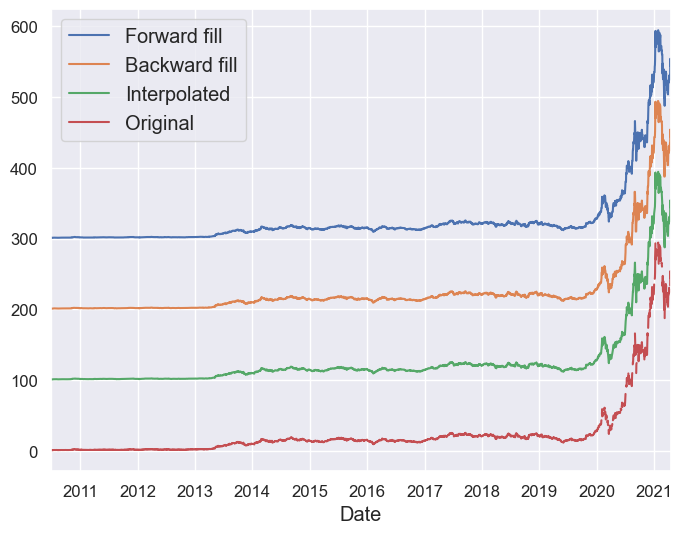

In [351]:
# Plot the original and interpolated data
fig, ax = plt.subplots(figsize=(8, 6))

# I added 300, 200 and 100, so that the graphs do not overlap
(ffill_df+300).plot(ax=ax)
(bfill_df+200).plot(ax=ax)
(interpolated_df+100).plot(ax=ax)
combined_df.plot(ax=ax)

plt.legend(['Forward fill', 'Backward fill', 'Interpolated','Original'])
plt.show()

In [359]:
# save the DataFrames to a CSV files

ffill_df.to_csv('ffill_tesla_df.csv')
bfill_df.to_csv('bfill_tesla_df.csv')
interpolated_df.to_csv('interpolated_tesla_df.csv')

#Original data containing dates that stock market were open
tesla_df.to_csv('tesla_original.csv')

In [360]:
#storing the dataframes
%store ffill_df
%store bfill_df
%store interpolated_df
%store tesla_df

Stored 'ffill_df' (DataFrame)
Stored 'bfill_df' (DataFrame)
Stored 'interpolated_df' (DataFrame)
Stored 'tesla_df' (DataFrame)
